In [2]:
%load_ext autoreload
%autoreload 2
# %config Application.verbose_crash=True

In [3]:
import os
from src.dataclasses.transactions import Transactions
from src.dataclasses.ticker import Ticker
from src.dataclasses.holdings import Holdings
from src.dataclasses.prices import Prices
from src.dataclasses.subscriptions import Subscriptions

from src.utils.defaults import DEFAULT_RFR

## Load in subscriptions

In [4]:
subscriptions = Subscriptions.from_csv(os.getcwd() + "/data/subscriptions.csv")
subscriptions.data.head()

,Portfolio,GBP,USD
Date,,,
2022-08-23,LISA,1993.88,2346.099947
2022-08-24,0,0.00,0.000000
2022-08-25,0,0.00,0.000000
2022-08-26,0,0.00,0.000000
2022-08-27,0,0.00,0.000000


## Load in transactions

In [5]:
transactions = Transactions.from_csv(os.getcwd() + "/data/full_transaction_history.csv")
transactions.raw_data.head()

,Portfolio,Date,Transaction,Description,Quantity,Price,Ticker
0,LISA,2022-08-23,Purchase,GameStop Corp Class A,32,30.00,GME
1,LISA,2022-08-23,Purchase,Vanguard S&P 500 UCITS ETF GBP,15,67.11,VUSA.L
2,LISA,2022-09-02,Purchase,GameStop Corp Class A,82,24.13,GME
3,LISA,2022-10-05,Purchase,GameStop Corp Class A,42,23.09,GME
4,ISA,2022-11-04,Purchase,iShares Core S&P 500 ETF USD Acc GBP,8,345.20,CSP1.L


In [6]:
Ticker("GBPUSD=X", is_fx=True).prices.tail()

Date
2025-11-14    1.315218
2025-11-15    1.315218
2025-11-16    1.315218
2025-11-17    1.316015
2025-11-18    1.317245
Freq: D, Name: GBPUSD=X, dtype: float64

In [7]:
from concurrent.futures import ThreadPoolExecutor


pool = ThreadPoolExecutor(max_workers=10)
prices = Prices(transactions=transactions, pool=pool)
prices.data.tail()

Loading prices: 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]


,AAPL,AMZN,ORCL,GOOG,GME,META,MU,DJEL.L,VUSA.L,GXLK.L,CSP1.L
Date,,,,,,,,,,,
2025-11-14,272.410004,234.690002,222.850006,276.980011,20.66,609.460022,246.830002,479.166918,128.046366,154.735438,722.370515
2025-11-15,272.410004,234.690002,222.850006,276.980011,20.66,609.460022,246.830002,479.166918,128.046366,154.735438,722.370515
2025-11-16,272.410004,234.690002,222.850006,276.980011,20.66,609.460022,246.830002,479.166918,128.046366,154.735438,722.370515
2025-11-17,267.459991,232.869995,219.860001,285.600006,20.50,602.010010,241.949997,476.463103,127.377059,152.605057,718.649279
2025-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.656168,126.109782,NaN,711.826222


In [8]:
holdings = Holdings(
    transactions=transactions, prices=prices, subscriptions=subscriptions
)

<Axes: >

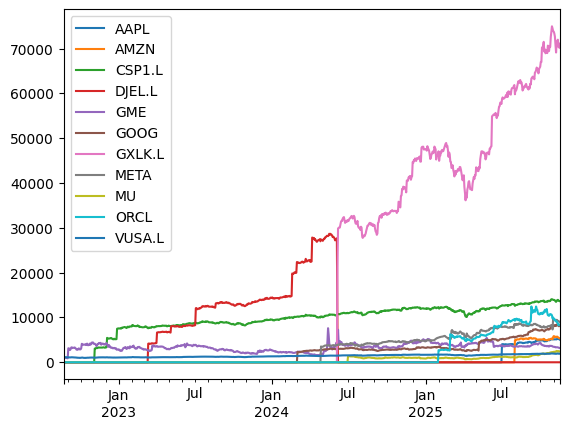

In [9]:
holdings.data.plot()

<Axes: xlabel='Date'>

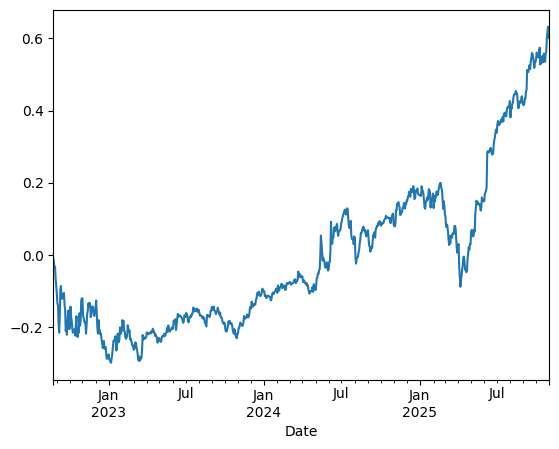

In [10]:
holdings.twr.add(1).cumprod().sub(1).plot()
# holdings.twr[holdings.twr > 0.1].resample("D").sum().fillna(0).plot()

In [11]:
holdings.transactions.data

Ticker,AAPL,AMZN,CSP1.L,DJEL.L,GME,GOOG,GXLK.L,META,MU,ORCL,VUSA.L
2022-08-23,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,15.0
2022-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-11-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Date'>

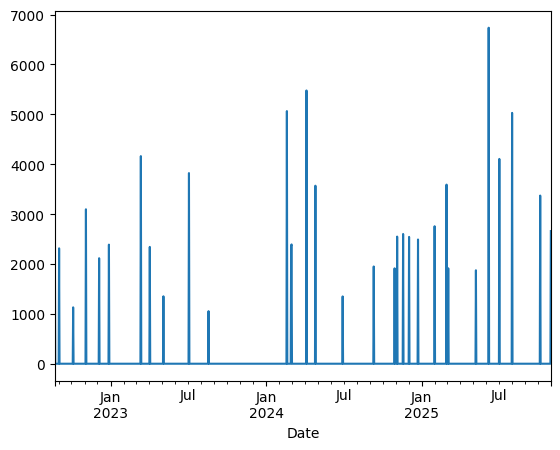

In [12]:
holdings.subscriptions.data["USD"].resample("D").sum().fillna(0).plot()

<Axes: xlabel='Date'>

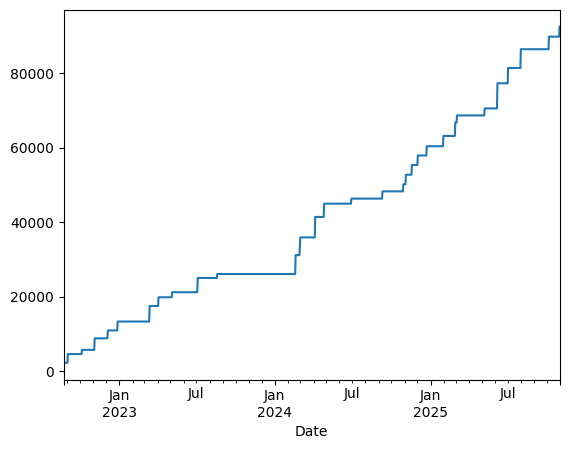

In [13]:
holdings.subscriptions.data["USD"].resample("D").sum().cumsum().fillna(0).plot()

<Axes: >

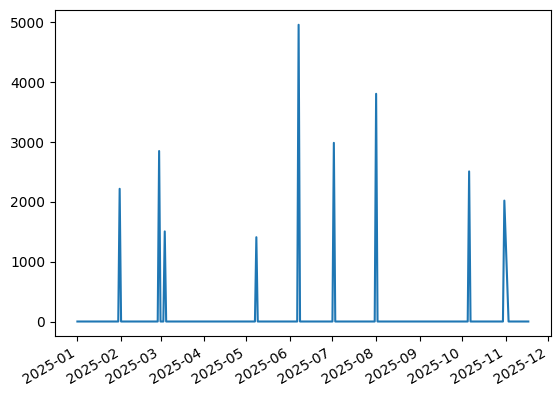

In [14]:
cfs = (
    holdings.subscriptions.data["GBP"]
    # .resample("D")
    # .sum()  # in case of multiple deposits per day
    .reindex(holdings.total.index.union(holdings.subscriptions.data.index))
    .fillna(0.0)
)

cfs["2025":].plot()

In [15]:
holdings.subscriptions.data["GBP"].max()

np.float64(4960.57)

In [16]:
subscriptions.data

,Portfolio,GBP,USD
Date,,,
2022-08-23,LISA,1993.88,2346.099947
2022-08-24,0,0.00,0.000000
2022-08-25,0,0.00,0.000000
2022-08-26,0,0.00,0.000000
2022-08-27,0,0.00,0.000000
...,...,...,...
2025-10-27,0,0.00,0.000000
2025-10-28,0,0.00,0.000000
2025-10-29,0,0.00,0.000000


<Axes: >

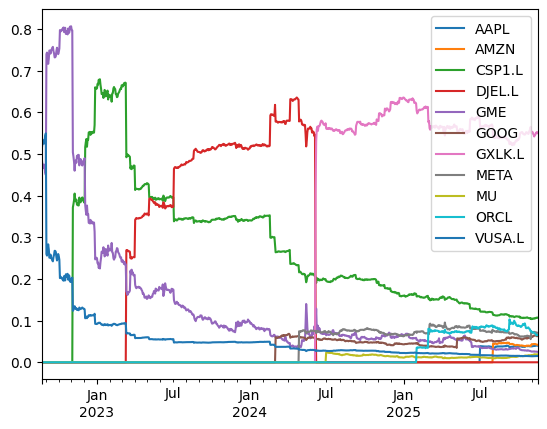

In [17]:
holdings.weights.plot()

In [18]:
from src.constants import YfTickers


bmk = Ticker(YfTickers.SPX).returns
bmk

Date
2015-11-19   -0.001123
2015-11-20    0.003810
2015-11-21    0.000000
2015-11-22    0.000000
2015-11-23   -0.001235
                ...   
2025-11-13   -0.016557
2025-11-14   -0.000502
2025-11-15    0.000000
2025-11-16    0.000000
2025-11-17   -0.009162
Freq: D, Name: Returns, Length: 3652, dtype: float64

In [19]:
from src.dataclasses.assessment_config import AssessmentConfig


config = AssessmentConfig(
    returns=holdings.twr,
    rfr=DEFAULT_RFR,
    bmk=bmk,
)

In [20]:
from src.evaluation import Evaluation, ExecutorType

executor = ExecutorType.ProcessPool()
# executor = ExecutorType.Remote("http://localhost:8000")
# executor = ExecutorType.DEFAULT()


In [21]:
# %tb

# executor = ExecutorType.DEFAULT()



e = (Evaluation(config)
    # .with_assessment_types(["summary"]).with_assessments(["Beta"])
    # .with_assessments([AssessmentName.Beta])
    # .with_assessment_types(["rolling"])
    .with_executor(executor=executor)
)




2025-11-18 08:16:45 INFO [src.evaluation] Using ProcessPoolExecutor


In [22]:
r = e.run()
r.timer_report()

ASSESSMENT TIMING REPORT

Kurtosis            |██████                                            | 13.2% |    0.369s |
Skewness            |██████                                            | 13.2% |    0.368s |
CVaR                |██████                                            | 12.9% |    0.359s |
Omega Ratio         |██████                                            | 12.5% |    0.349s |
Up Capture          |████                                              |  9.2% |    0.256s |
Ulcer Index         |████                                              |  8.8% |    0.246s |
Down Capture        |████                                              |  8.4% |    0.235s |
Semi-Variance       |███                                               |  7.6% |    0.212s |
M2 Ratio            |███                                               |  6.6% |    0.185s |
Sharpe Ratio        |█                                                 |  3.2% |    0.089s |
Cumulative Returns  |                       

"============================================================================================\nASSESSMENT TIMING REPORT\n============================================================================================\n\nKurtosis            |██████                                            | 13.2% |    0.369s |\nSkewness            |██████                                            | 13.2% |    0.368s |\nCVaR                |██████                                            | 12.9% |    0.359s |\nOmega Ratio         |██████                                            | 12.5% |    0.349s |\nUp Capture          |████                                              |  9.2% |    0.256s |\nUlcer Index         |████                                              |  8.8% |    0.246s |\nDown Capture        |████                                              |  8.4% |    0.235s |\nSemi-Variance       |███                                               |  7.6% |    0.212s |\nM2 Ratio            |███       

In [23]:
print(r.get_summary_results())

                        Value
Beta                 0.801488
CAGR                 0.152922
Max Drawdown        -0.292340
Tracking Error       0.221017
Volatility           0.254604
Correlation          0.512391
VaR                 -0.024394
CVaR                -0.037178
Up Capture           0.929495
Down Capture         0.905621
Sharpe Ratio         0.212847
Sortino Ratio        0.313453
Information Ratio    0.038975
Calmar Ratio         0.523097
Treynor Ratio        0.067601
Jensen's Alpha       0.017660
Omega Ratio          1.139033
M2 Ratio            -0.010929
Skewness             0.435138
Kurtosis             5.245012
Semi-Variance        0.022453
R-Squared            0.262545
Ulcer Index         13.367719
Mean Return          0.174572
Cumulative Returns   0.600603


In [24]:
# Had more capital and more focused on active mgmt
# (switched away from majority holding in DOW)
config_active = AssessmentConfig(
    returns=holdings.twr,
    rfr=DEFAULT_RFR,  # 3mo US Tresury
    bmk=bmk,  # SP500
    start="2024",
)

f_active = Evaluation(config_active).run()
# pd.Series(f_active.results)

# Multiple Portfolios

In [25]:
from src.constants import YfTickers


sp500 = Ticker(YfTickers.SPX).returns
qqq = Ticker(YfTickers.QQQ).returns
us_3mo = Ticker(YfTickers.US_3mo).returns
us_10yr = Ticker(YfTickers.US_10yr).returns



In [26]:

multi_asset_config = AssessmentConfig(
    returns={"Full": holdings.twr, "Active": holdings.twr["2024":]},
    rfr={"USA 3mo": us_3mo, "USA 10yr": us_10yr},
    bmk={"SPY": sp500, "QQQ": qqq},
)

AttributeError: 'dict' object has no attribute 'empty'

In [ ]:
executor = ExecutorType.ProcessPool()

In [ ]:
multi_eval = (
    Evaluation(
        config=multi_asset_config
    )
    # .with_executor(executor)
)

In [ ]:
multi_result = multi_eval.run()
multi_result

EvaluationResults(assessments=2, total_results=4)

In [ ]:
multi_result.

ValueError: No summary results available to plot